# Used Bikes Price Prediction Using Regression Algorithms

Bike Price Prediction is a machine learning project that uses historical data to predict the price of a bike. This can be useful for bike sellers, who can use it to set a fair price for their bikes, and for bike buyers, who can use it to make sure they are not overpaying for a bike. The project will use a variety of machine learning algorithms, including __Linear Regression, Random Forest and XG Boost__ to predict the price of a bike. It will also use data visualization techniques to help understand the data and the results of the machine learning algorithms. 

__Steps Performed__

1) __Data Preprocessing__ : Checked for outliers, incorrect values, missing values, duplicate, performed data type correction and string formatting.

2) __Exploratory Data Analysis__ : Performed Univariate, Bivariate, and Multivariate analysis with various graphs and plots to better understand the distribution of features and their relationships.

3) __Feature Selection__: Used various feature selection techniques like Pearson Correlation Test, Exhaustive Feature selection to select the best features to build ML model.

4) __Model Building__: Implementation of various Regression Algorithms like Linear Regression, Random Forest and XG Boost to build a price predicting model.

In [1]:
#Importing Required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bikes33.csv')
df.head()

,owner,location,bike_name,kms_driven,price,age,power,mileage
0,first owner,hyderabad,Avenger,17000.0,63500.0,6,19.0,35.0
1,first owner,hyderabad,Enfield,50000.0,115000.0,7,19.8,35.0
2,first owner,hyderabad,GT250R,14795.0,300000.0,11,28.0,30.0
3,third owner,bangalore,Duke,24561.0,63400.0,11,25.0,35.0
4,first owner,bangalore,Pulsar,19718.0,55000.0,7,17.0,65.0


In [3]:
df.shape

(7365, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7365 entries, 0 to 7364
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   owner       7365 non-null   object 
 1   location    7365 non-null   object 
 2   bike_name   7365 non-null   object 
 3   kms_driven  7365 non-null   float64
 4   price       7365 non-null   float64
 5   age         7365 non-null   int64  
 6   power       7365 non-null   float64
 7   mileage     7365 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 460.4+ KB


In [5]:
#Checking Null values
df.isna().sum()

owner         0
location      0
bike_name     0
kms_driven    0
price         0
age           0
power         0
mileage       0
dtype: int64

There is no Null Value present in our data.

# Univariate Analysis

<AxesSubplot:>

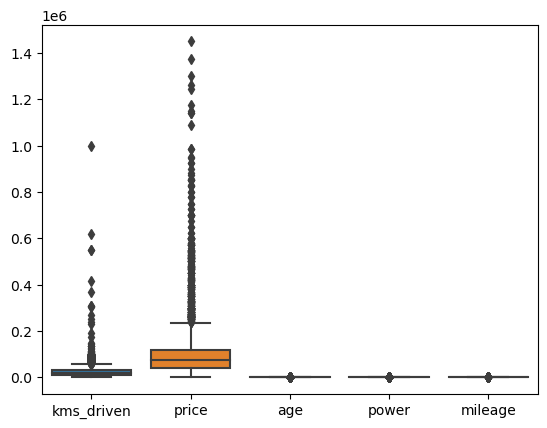

In [6]:
#Checking If there are any outliers present in data.
sns.boxplot(data=df)

From the above plot we can infer that Outliers are present in all numeric columns. We will remove them one by one.

# Owner

In [7]:
#Finding the number of Unique owners.
df['owner'].unique()

array(['first owner', 'third owner', 'second owner',
       'fourth owner or more'], dtype=object)

<AxesSubplot:>

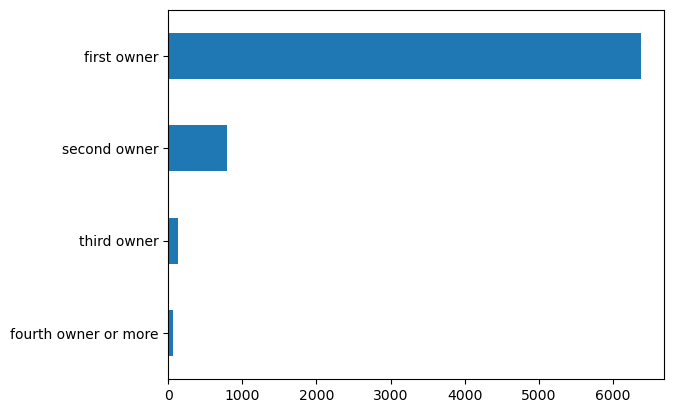

In [8]:
# Finding how different types of Owners are distributed within data.
df['owner'].value_counts().sort_values(ascending=True).plot(kind='barh')

# Location

In [9]:
#Finding the number of unique Locations in our Dataset.
df['location'].nunique()

534

<AxesSubplot:>

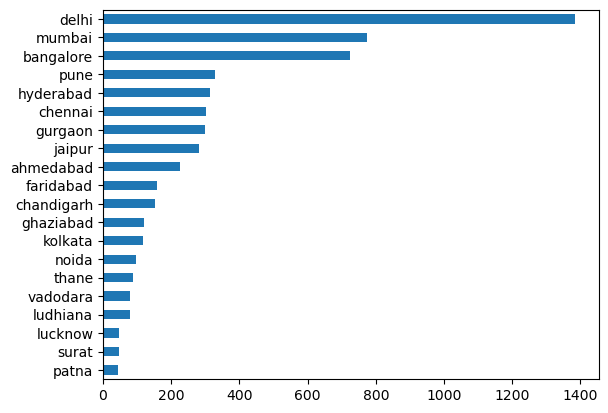

In [10]:
#Finding top 20 cities according to number of bikes purchased.
df['location'].value_counts().head(20).sort_values(ascending=True).plot(kind='barh')

# Bike Name

In [11]:
df['bike_name'].nunique()

54

<AxesSubplot:>

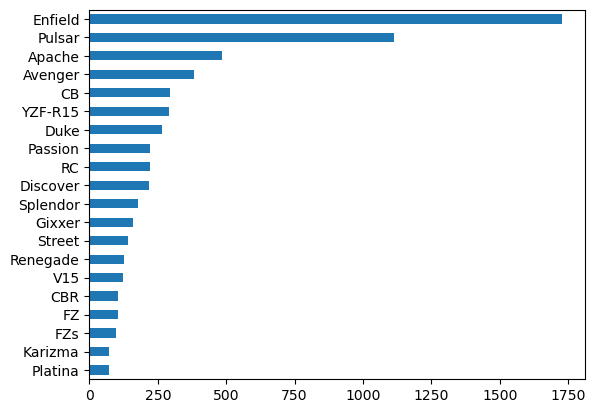

In [12]:
#Finding top 20 bikes according to number of purchases.
df['bike_name'].value_counts().head(20).sort_values(ascending=True).plot(kind='barh')

# Kms_driven

<AxesSubplot:xlabel='kms_driven', ylabel='Count'>

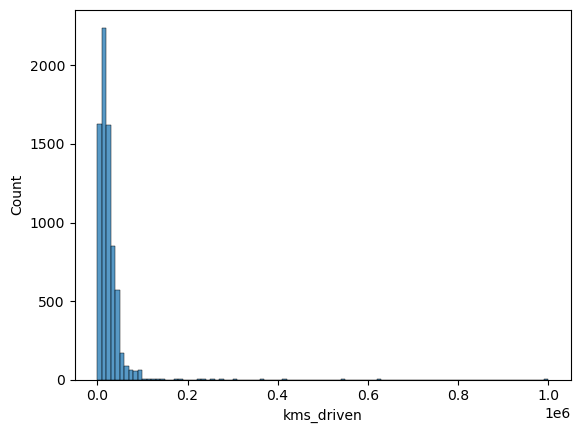

In [13]:
#Plotting distributon of 'kms_driven' within the data.
sns.histplot(df['kms_driven'],bins=100)

In [14]:
df['kms_driven'].agg(['min','max','mean','median','std']).round()

min             4.0
max       1000000.0
mean        23913.0
median      19000.0
std         25684.0
Name: kms_driven, dtype: float64

<AxesSubplot:xlabel='kms_driven', ylabel='Count'>

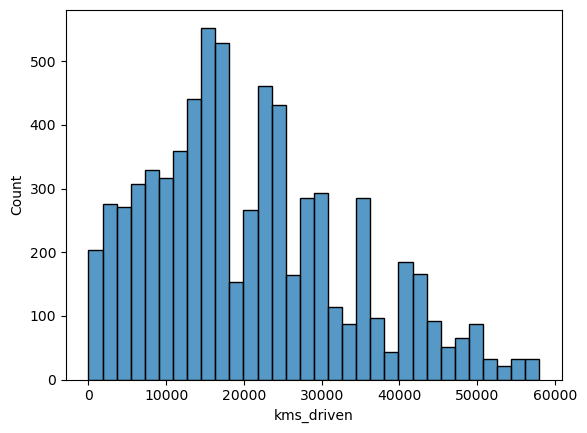

In [15]:
#Removing Outliers from 'kms_driven' column.
q1=np.percentile(df['kms_driven'],25)
q3=np.percentile(df['kms_driven'],75)
iqr=q3-q1
l=q1-1.5*iqr
u=q3+1.5*iqr
df2=df[df['kms_driven']<=u]
sns.histplot(df2['kms_driven'])

# Price

<AxesSubplot:xlabel='price', ylabel='Count'>

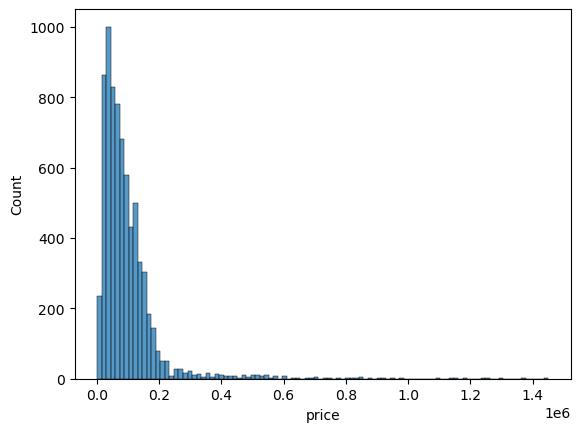

In [16]:
#Plotting distributon of 'price' column.
sns.histplot(df['price'],bins=100)

In [17]:
df['price'].agg(['min','max','mean','median','std']).round()

min          2000.0
max       1450000.0
mean        96531.0
median      73000.0
std        100483.0
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

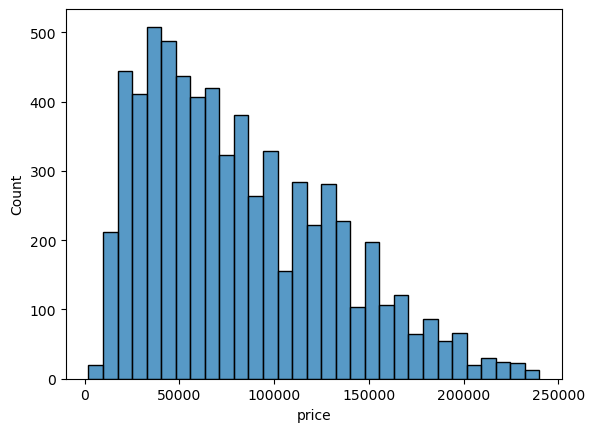

In [18]:
#Removing Outliers from 'price' column.
q1=np.percentile(df2['price'],25)
q3=np.percentile(df2['price'],75)
iqr=q3-q1
l=q1-1.5*iqr
u=q3+1.5*iqr
df3=df2[df2['price']<=u]
sns.histplot(df3['price'])

# Age

<AxesSubplot:xlabel='age', ylabel='count'>

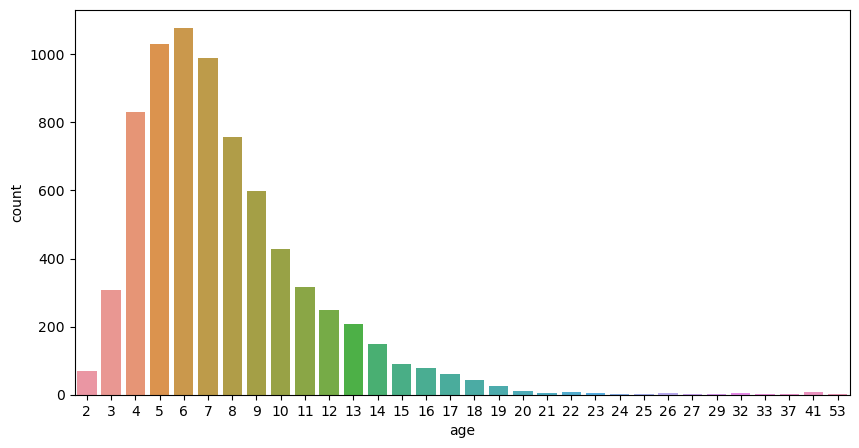

In [19]:
#Plotting distributon of 'Age' column.
plt.figure(figsize=(10,5))
sns.countplot(df['age'])

In [20]:
df['age'].describe()[['min','mean','max','std']].round()

min      2.0
mean     8.0
max     53.0
std      4.0
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='count'>

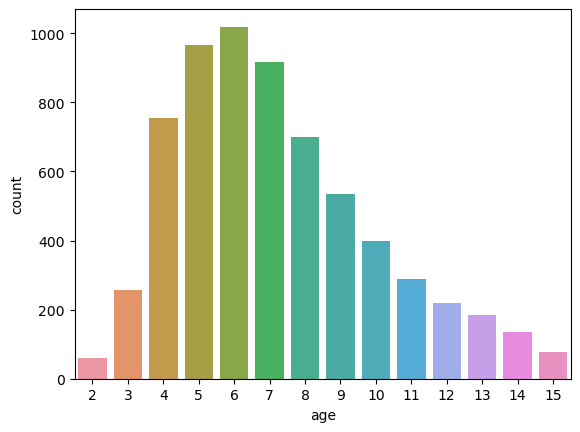

In [21]:
#Removing Outliers from 'Age' column.
q1=np.percentile(df3['age'],25)
q3=np.percentile(df3['age'],75)
iqr=q3-q1
l=q1-1.5*iqr
u=q3+1.5*iqr
df4=df3[df3['age']<=u]
sns.countplot(df4['age'])

# Power

<AxesSubplot:xlabel='power', ylabel='Count'>

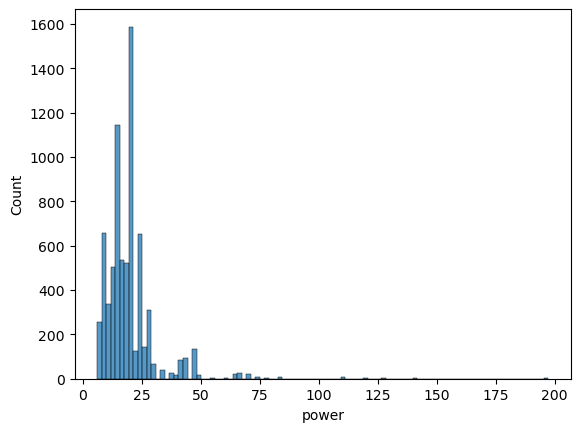

In [22]:
#Plotting distributon of 'power' column.
sns.histplot(df['power'],bins=100)

In [23]:
df['power'].describe()[['min','mean','max','std']].round()

min       6.0
mean     20.0
max     197.0
std      11.0
Name: power, dtype: float64

<AxesSubplot:xlabel='power', ylabel='Count'>

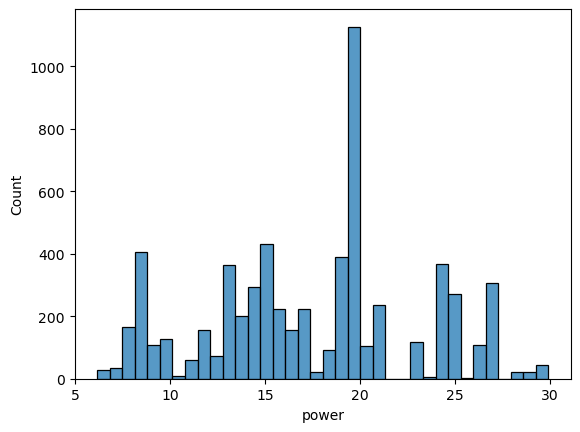

In [24]:
#Removing Outliers from 'power' column.
q1=np.percentile(df4['power'],25)
q3=np.percentile(df4['power'],75)
iqr=q3-q1
l=q1-1.5*iqr
u=q3+1.5*iqr
df5=df4[df4['power']<=u]
sns.histplot(df5['power'])

# Mileage

<AxesSubplot:xlabel='mileage', ylabel='Count'>

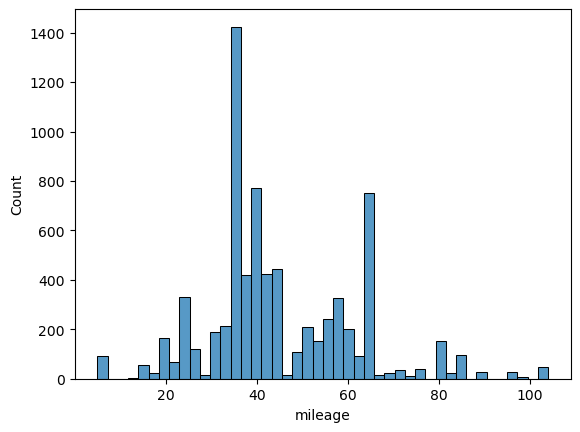

In [25]:
#Plotting distributon of 'mileage' column.
sns.histplot(df['mileage'])

In [26]:
df['mileage'].describe()[['min','max','std','mean','50%']].round()

min       5.0
max     104.0
std      17.0
mean     45.0
50%      40.0
Name: mileage, dtype: float64

<AxesSubplot:xlabel='mileage', ylabel='Count'>

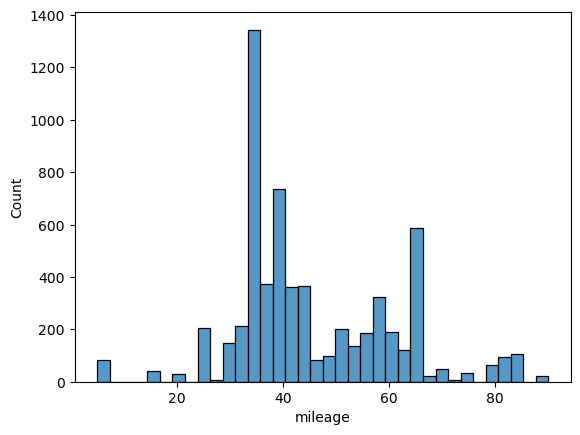

In [27]:
#Removing Outliers from 'mileage' column.
q1=np.percentile(df5['mileage'],25)
q3=np.percentile(df5['mileage'],75)
iqr=q3-q1
l=q1-1.5*iqr
u=q3+1.5*iqr
df6=df5[df5['mileage']<=u]
sns.histplot(df6['mileage'])

<AxesSubplot:>

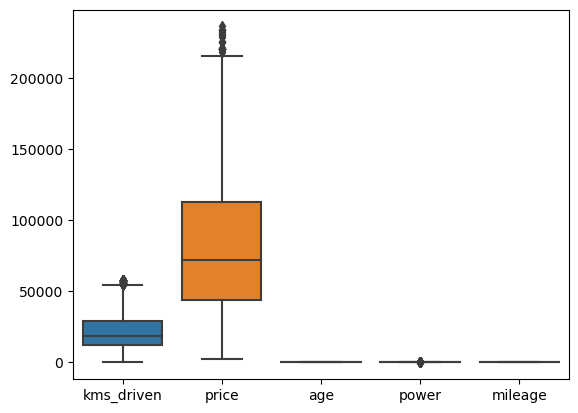

In [28]:
#Below plot shows boxplot after removing Outliers.
sns.boxplot(data=df6)

# Bivariate Analysis

In [29]:
df6.shape

(6223, 8)

In [30]:
#As the ouliers are removed we need to reset the index.
df6.reset_index(inplace=True)

In [31]:
df6.drop(['index'],axis=1,inplace=True)

In [32]:
df6.head()

,owner,location,bike_name,kms_driven,price,age,power,mileage
0,first owner,hyderabad,Avenger,17000.00000,63500.0,6,19.00,35.0
1,first owner,hyderabad,Enfield,50000.00000,115000.0,7,19.80,35.0
2,third owner,bangalore,Duke,24561.00000,63400.0,11,25.00,35.0
3,first owner,bangalore,Pulsar,19718.00000,55000.0,7,17.00,65.0
4,first owner,hyderabad,Apache,11309.13665,120000.0,3,20.21,40.0


In [33]:
#Analyising relationship between 'location' and 'owner'.
p=pd.crosstab(df6['location'],df6['owner'])
p.head()

owner,first owner,fourth owner or more,second owner,third owner
location,,,,
24 pargana,8,0,3,0
adalaj,2,0,0,0
adilabad,1,0,0,0
adoni,1,0,0,0
adyar,1,0,0,0


In [34]:
#Maximum First Owners belong to Delhi.
p[p['first owner']==p['first owner'].max()]

owner,first owner,fourth owner or more,second owner,third owner
location,,,,
delhi,1034,6,120,24


In [35]:
#Maximum Second Owners belong to Delhi.
p[p['second owner']==p['second owner'].max()]

owner,first owner,fourth owner or more,second owner,third owner
location,,,,
delhi,1034,6,120,24


In [36]:
#Maximum Third Owners belong to Delhi.
p[p['third owner']==p['third owner'].max()]

owner,first owner,fourth owner or more,second owner,third owner
location,,,,
delhi,1034,6,120,24


In [37]:
#Maximum Fourth Owners belong to Jaipur.
p[p['fourth owner or more']==p['fourth owner or more'].max()]

owner,first owner,fourth owner or more,second owner,third owner
location,,,,
jaipur,189,9,18,4


In [38]:
#In case if we wish to see Owner distribution of particular city we can use below code.
p.loc[['delhi','yamuna nagar','pune']]

owner,first owner,fourth owner or more,second owner,third owner
location,,,,
delhi,1034,6,120,24
yamuna nagar,4,0,0,0
pune,238,2,29,1


In [39]:
#Analyising relationship between 'bike_name' and 'owner'.
q=pd.crosstab(df6['bike_name'],df6['owner'])
q.head()

owner,first owner,fourth owner or more,second owner,third owner
bike_name,,,,
Apache,361,5,35,13
Aquila,6,0,2,0
Avenger,325,0,39,4
CB,245,1,29,3
CBF,24,1,7,0


In [40]:
#Maximum First Owners prefer buying Royal Enfield bike.
q[q['first owner']==q['first owner'].max()]

owner,first owner,fourth owner or more,second owner,third owner
bike_name,,,,
Enfield,1420,2,148,14


In [41]:
#Maximum Second Owners prefer buying Royal enfield bike.
q[q['second owner']==q['second owner'].max()]

owner,first owner,fourth owner or more,second owner,third owner
bike_name,,,,
Enfield,1420,2,148,14


In [42]:
#Maximum Third Owners prefer buying Pulsar bike.
q[q['third owner']==q['third owner'].max()]

owner,first owner,fourth owner or more,second owner,third owner
bike_name,,,,
Pulsar,821,26,124,21


In [43]:
#Maximum Fourth Owners prefer buying Pulsar bike.
q[q['fourth owner or more']==q['fourth owner or more'].max()]

owner,first owner,fourth owner or more,second owner,third owner
bike_name,,,,
Pulsar,821,26,124,21


In [44]:
#In case if we wish to see Owner distribution for particular bike we can use below code.
q.loc[['Splendor','Discover','Passion']]

owner,first owner,fourth owner or more,second owner,third owner
bike_name,,,,
Splendor,140,0,9,1
Discover,164,0,12,1
Passion,152,2,10,2


<AxesSubplot:ylabel='owner'>

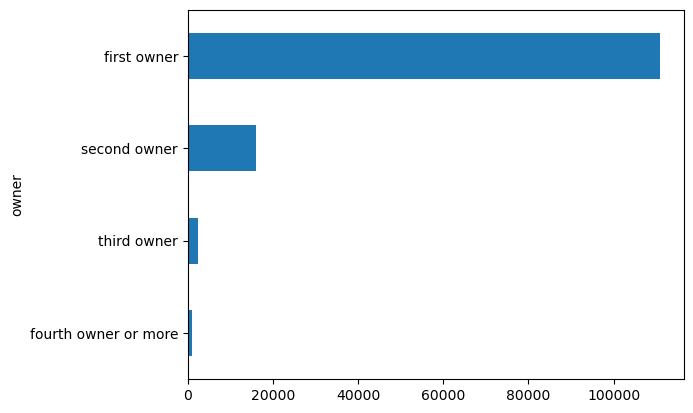

In [45]:
#Below plot shows kms_travelled by bikes owned by different types of owners.
((df6.groupby(['owner']).kms_driven.sum())/1000).round(2).sort_values(ascending=True).plot(kind='barh')

In [46]:
#Below data shows top 10 bikes according to total kms driven with them in terms of Lakhs.
(df6.groupby(['bike_name']).kms_driven.sum().round().sort_values(ascending=False).head(10))/100000

bike_name
Enfield     290.02251
Pulsar      248.44657
Apache       82.00590
Avenger      75.23857
CB           68.85357
YZF-R15      52.82666
Discover     50.65059
Passion      39.32752
Splendor     31.61009
Duke         28.47620
Name: kms_driven, dtype: float64

In [47]:
#Below data shows top 10 bikes according to their mean price.
df6.groupby(['bike_name']).price.mean().round().sort_values(ascending=False).head(10)

bike_name
GT250R      181552.0
Aquila      161638.0
Forty       159988.0
RC          145485.0
TNT         133667.0
Duke        128852.0
Renegade    128446.0
Enfield     124919.0
Ninja       121771.0
FZ25        103838.0
Name: price, dtype: float64

In [48]:
#Below data shows top 10 bikes according to their mean power.
df6.groupby(['bike_name']).power.mean().round().sort_values(ascending=False).head(10)

bike_name
Ninja       30.0
GT250R      28.0
TNT         28.0
Forty       27.0
Aquila      26.0
Renegade    25.0
RC          24.0
Duke        24.0
Enfield     22.0
CBR         22.0
Name: power, dtype: float64

In [49]:
#Below data shows top 10 bikes according to their mean age.
df6.groupby(['bike_name']).age.mean().round().sort_values(ascending=False).head(10)

bike_name
CBF         12.0
Hunk        11.0
CBZ         11.0
Ninja       11.0
Enfield‎    10.0
Fazer       10.0
Karizma     10.0
Discover    10.0
FZ16        10.0
Ignitor      9.0
Name: age, dtype: float64

In [50]:
#Below data shows top 10 bikes according to their mean mileage.
df6.groupby(['bike_name']).mileage.mean().round().sort_values(ascending=False).head(10)

bike_name
Star        85.0
Dream       84.0
Platina     84.0
CT          79.0
Super       75.0
CD          75.0
Victor      74.0
Discover    72.0
Splendor    70.0
CBF         65.0
Name: mileage, dtype: float64

# Multivariate Analysis

In [51]:
df6.head()

,owner,location,bike_name,kms_driven,price,age,power,mileage
0,first owner,hyderabad,Avenger,17000.00000,63500.0,6,19.00,35.0
1,first owner,hyderabad,Enfield,50000.00000,115000.0,7,19.80,35.0
2,third owner,bangalore,Duke,24561.00000,63400.0,11,25.00,35.0
3,first owner,bangalore,Pulsar,19718.00000,55000.0,7,17.00,65.0
4,first owner,hyderabad,Apache,11309.13665,120000.0,3,20.21,40.0


<AxesSubplot:>

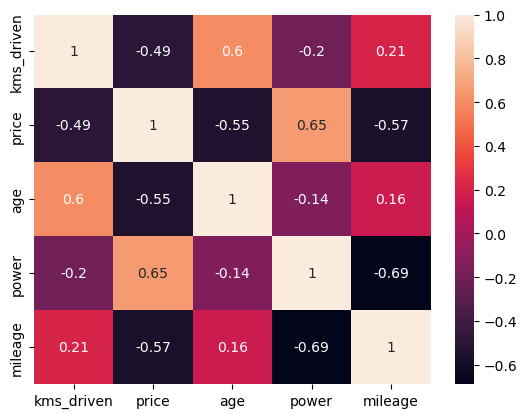

In [52]:
#Heatmap is plotted to see correlation between various features of the dataset.
sns.heatmap(df6.corr(),annot=True)

From the above plot we can infer that:
1) There is high +ve correlation between Age and Kms Driven.                                    
2) There is high +ve correlation between power and price.                                                                  
3) There is high -ve correlation between age and price.      
4) There is high -ve correlation between mileage and price.   
5) There is high -ve correlation between power and mileage.

<AxesSubplot:xlabel='power', ylabel='price'>

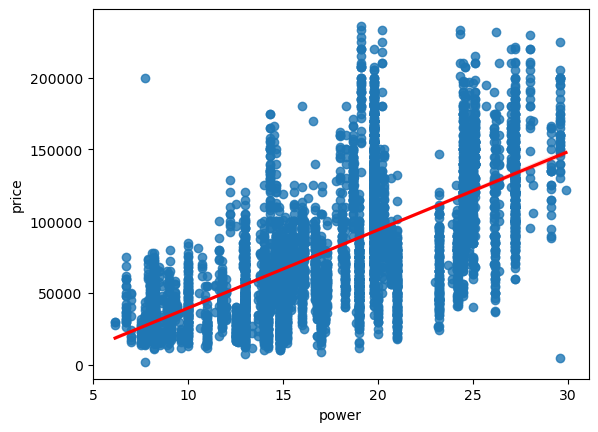

In [53]:
#Below plot shows regression plot between power and price column.
sns.regplot(x=df6['power'],y=df6['price'],line_kws={'color':'red'})

Clearly there is an +ve correlation between price and power.

<AxesSubplot:xlabel='age', ylabel='kms_driven'>

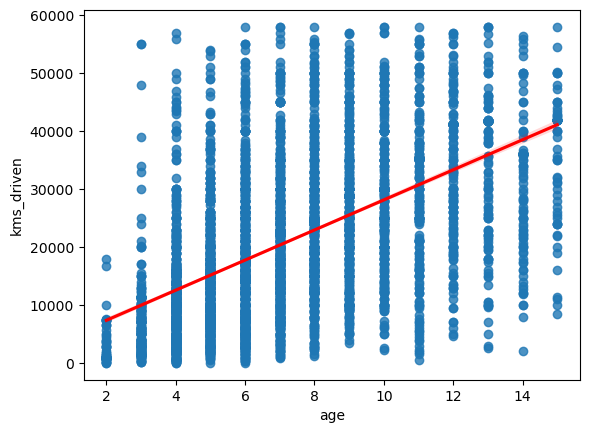

In [54]:
#Below plot shows regression plot between age and kms_driven.
sns.regplot(x=df6['age'],y=df6['kms_driven'],line_kws={'color':'red'})

Clearly there is an +ve correlation between age and kms_driven.

<AxesSubplot:xlabel='age', ylabel='price'>

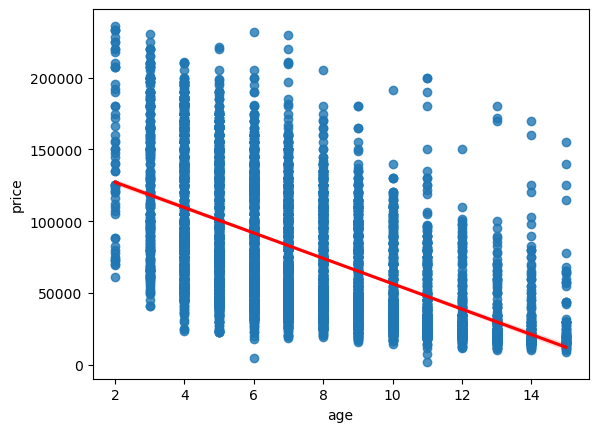

In [55]:
#Below plot shows regression plot between age and price column.
sns.regplot(x=df6['age'],y=df6['price'],line_kws={'color':'red'})

Clearly there is an -ve correlation between price and age.

<AxesSubplot:xlabel='mileage', ylabel='price'>

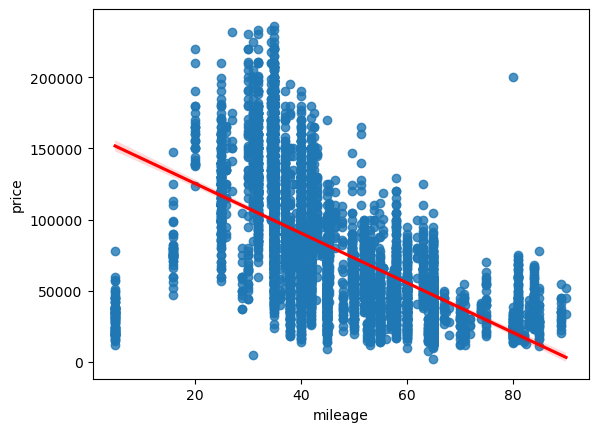

In [56]:
#Below plot shows regression plot between mileage and price column.
sns.regplot(x=df6['mileage'],y=df6['price'],line_kws={'color':'red'})

Clearly there is an -ve correlation between price and mileage.

<AxesSubplot:xlabel='power', ylabel='mileage'>

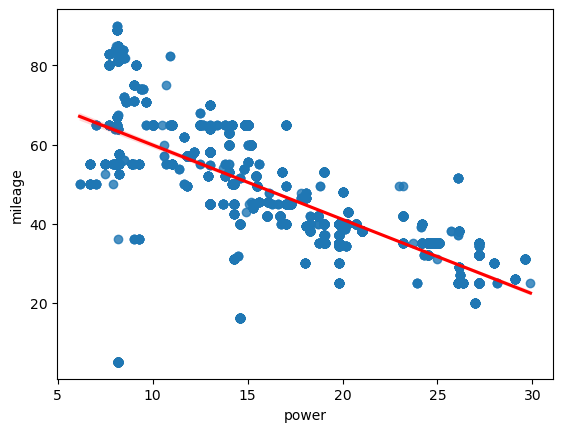

In [57]:
#Below plot shows regression plot between power and mileage column.
sns.regplot(x=df6['power'],y=df6['mileage'],line_kws={'color':'red'})

Clearly there is an -ve correlation between mileage and power.

<AxesSubplot:>

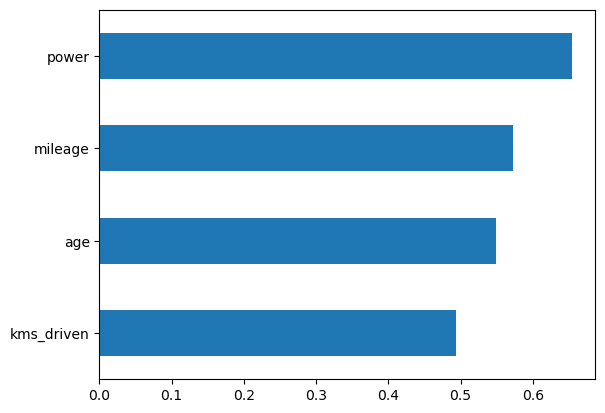

In [58]:
#Below plot shows in descending order the features having high correlation with price variable.
g=df6.corr()
(g['price'].abs().sort_values(ascending=False).tail(4)).sort_values(ascending=True).plot(kind='barh')